# Problem Statement:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes. Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

# Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

# Points to Remember:

There are no null values in the dataset.
There may be some customers with no loan history.
The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.
Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset

file = r'/Users/dipikamundhra/Downloads/Micro Credit Defaulter Project/sample_data_credit_defaulter.csv'

data = pd.read_csv(file)

In [3]:
data

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [4]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [5]:
data.shape

(209593, 36)

In [6]:
# checking for null values

data.isna().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
# dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [8]:
# slicing

data.iloc[:,:15]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00


In [9]:
data.iloc[:,15:]

,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,0,947,947.0,2.50,0.0,0.0,0,0,2,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [10]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# Basic Data Information.

Data set has 209593 rows & 36 Columns.

Data set has no missing values.

Data set has 3 object data types column.

1) mssidn

2) pcircle

3) pdate

After extracting date, month & year from date there will be 2 object data type column only.

No use of mssidn column as it is mobile no. of the customers and we feel that mobile no. will play no role in predicting fraud cases. So we will drop this column.

Rest of the columns are continouos data having integer or float data type.

label column is our target column having 2 categories 0 & 1. 0 for fraud & 1 for no fraud.

Data Description shows that maximum of column's data are disrupted heavily. Standard Deviation are greater than mean value in maximum of columns. We will later study this.

First we will extract the date, month & year from the date column and will drop the date column to make it integer data type, than we will analyse the categorical column pcircle & will encode it after these 2 steps we will start our EDA process.

In [11]:
# extracting day, month, year from date column

data['pdate'] = pd.to_datetime(data['pdate'], errors = 'coerce')
data['day'] = data['pdate'].dt.day
data['month'] = data['pdate'].dt.month
data['year'] = data['pdate'].dt.year

# dropping pdate column

data = data.drop(columns = ['pdate'])

In [12]:
data['msisdn'].describe()

count          209593
unique         186243
top       04581I85330
freq                7
Name: msisdn, dtype: object

In [13]:
# dropping msisdn column

data = data.drop(columns = ['msisdn'])

# Exploratory Data Analysis

In [14]:
data['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [15]:
data['pcircle'].describe()

count     209593
unique         1
top          UPW
freq      209593
Name: pcircle, dtype: object

<AxesSubplot:xlabel='pcircle', ylabel='count'>

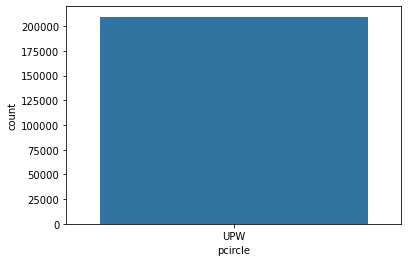

In [16]:
sns.countplot(data['pcircle'])

In [17]:
data = data.drop(columns = ['pcircle'])

pcircle column had only 1 unique value UPW which is a some kind of telecom circle. Because it has only 1 unique value thus it's relation with all other feature column and target column would be same, So the saturated column is for no use in predicting the fraud cases, hence we droped the column from data set.

In [18]:
data['label'].describe()

count    209593.000000
mean          0.875177
std           0.330519
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [19]:
data['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

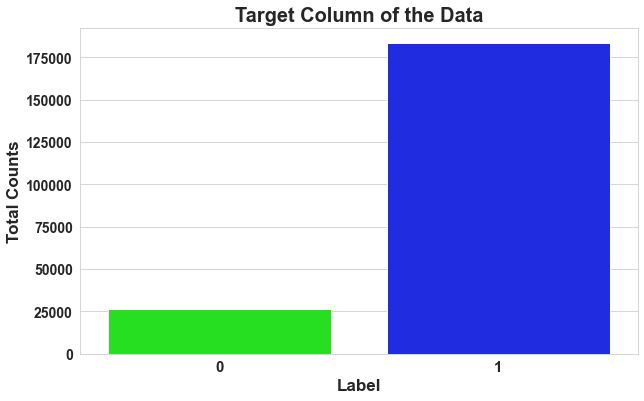

In [20]:
# countplot for label column

plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.countplot(data['label'], palette = 'hsv')
plt.title('Target Column of the Data', fontweight = 'bold', fontsize = 20)
plt.xlabel('Label', fontweight = 'bold', fontsize = 17)
plt.ylabel('Total Counts', fontweight = 'bold', fontsize = 17)
plt.xticks(fontweight = 'bold', fontsize = 15)
plt.yticks(fontweight = 'bold', fontsize = 14)
plt.show()

class column is highly imbalanced, we need to balance the data before sending it to machine learning algorithm.

In [21]:
# making a dataframe of continuous features for data visualization
cont_features = data.drop(columns = ['label', 'day', 'month', 'year'])

In [22]:
cont_features

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


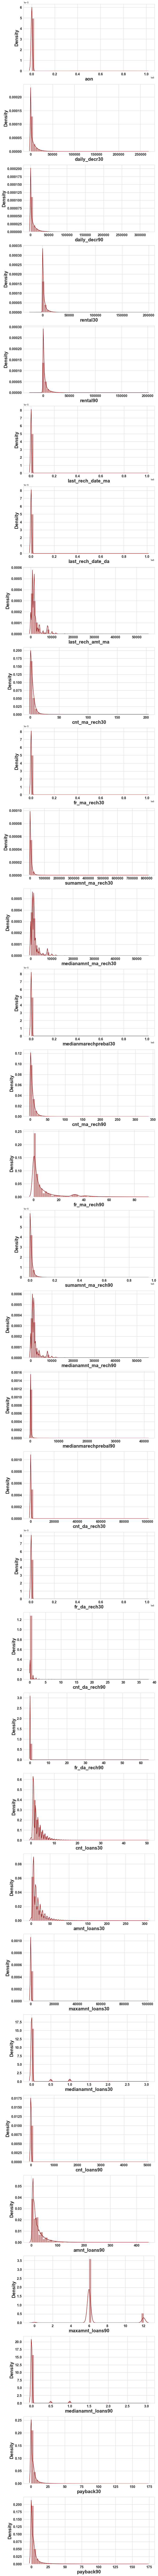

In [23]:
# for loop for plotting distribution plot of all continuous columns.
plt.figure(figsize = (10,200))
plotnumber = 1

for columns in cont_features:
    if plotnumber <= 32:
        ax = plt.subplot(32,1, plotnumber)
        sns.distplot(cont_features[columns], color = 'darkred')
        plt.xlabel(columns,fontweight = 'bold', fontsize = 20)
        plt.ylabel('Density', fontweight = 'bold', fontsize = 20)
        plt.xticks(fontweight = 'bold', fontsize = 15)
        plt.yticks(fontweight = 'bold', fontsize = 15)
    plotnumber+=1
plt.show()

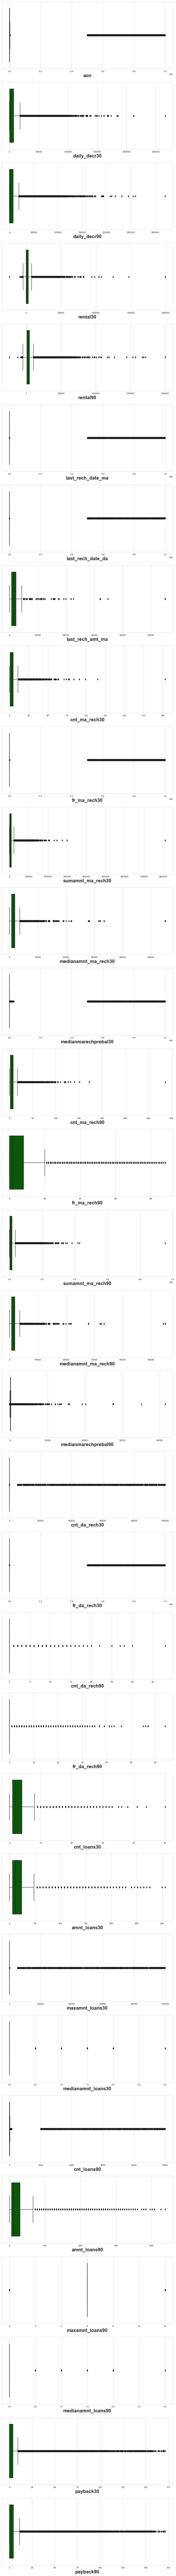

In [24]:
# for loop for plotting box plot of all continuous columns.
plt.figure(figsize = (13,200))
plotnumber = 1

for columns in cont_features:
    if plotnumber <= 32:
        ax = plt.subplot(32,1, plotnumber)
        sns.boxplot(cont_features[columns], color = 'darkgreen')
        plt.xlabel(columns,fontweight = 'bold', fontsize = 20)

    plotnumber+=1
plt.show()

## Univariate Data Analysis Conclusion.

With the help of above distribution plot & Boxplot univariate analysis of all the continuous feature columns of data set we found that distribution of the data in columns are quite complicated. Almost all the columns are heavily right skewed, we found that is because in almost all the column upto 75% & even 100% of the data are distributed in a certain range but there are some data points available in the column which are exceptionaly far-far higher in positive side than the 100% of the data. which is making it heavily right skewed data distribution and this is the only reason why in almost all the columns mean value is smaller than te standard deviation. There are some of the columns also which are even left skewed along with right skeweness like rental30, rental90, maxamnt_loans90.

There are some columns in the data set whose 25%, 50% & 75%, or i would say very fewer than 100% data are distributed on a single point and than there is a maximum or minimum value different than those of single points that is making them disrupted data distribution.

Hence there is a lots of outliers in all of the feature columns. We can't afford to remove such a amount of outliers from the columns 

In [25]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month,year
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.020168,0.005093,NaN
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000259,0.000906,NaN
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.024892,0.101704,NaN
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.009150,0.122772,NaN
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.050964,0.073416,NaN
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.019945,0.099160,NaN
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000758,-0.000924,NaN
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000660,-0.000530,NaN
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.032715,0.023358,NaN
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.080003,0.024767,NaN


In [26]:
data.iloc[0:,:20].corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306


In [27]:
data.iloc[0:,20:].corr()

,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month,year
fr_da_rech30,1.000000,0.000770,0.005505,-0.003212,-0.003395,-0.001070,-0.001141,-0.001623,-0.001593,-0.001069,-0.001623,0.001709,-0.000725,0.001054,-0.002340,NaN
cnt_da_rech90,0.000770,1.000000,0.348885,0.017976,0.026249,-0.001855,-0.003351,0.000907,0.020909,0.038019,-0.003094,0.013430,0.024046,0.062700,0.011482,NaN
fr_da_rech90,0.005505,0.348885,1.000000,0.010021,0.014935,-0.000754,-0.002234,0.001993,0.011501,0.021785,-0.000949,0.000354,0.001226,0.041018,0.008948,NaN
cnt_loans30,-0.003212,0.017976,0.010021,1.000000,0.957742,0.000251,-0.093146,0.015595,0.852905,0.143590,-0.097871,0.067842,0.033369,0.088162,0.009388,NaN
amnt_loans30,-0.003395,0.026249,0.014935,0.957742,1.000000,-0.000073,-0.078531,0.014625,0.897961,0.329170,-0.087989,0.060425,0.030901,0.081864,0.025875,NaN
maxamnt_loans30,-0.001070,-0.001855,-0.000754,0.000251,-0.000073,1.000000,0.007782,0.003987,-0.001850,-0.000487,0.009330,-0.001512,-0.000915,0.002046,0.000955,NaN
medianamnt_loans30,-0.001141,-0.003351,-0.002234,-0.093146,-0.078531,0.007782,1.000000,-0.003670,-0.067580,0.058378,0.911604,-0.006007,0.003178,-0.006145,0.023514,NaN
cnt_loans90,-0.001623,0.000907,0.001993,0.015595,0.014625,0.003987,-0.003670,1.000000,0.017697,0.001450,-0.002571,0.000587,-0.000476,0.002651,-0.000765,NaN
amnt_loans90,-0.001593,0.020909,0.011501,0.852905,0.897961,-0.001850,-0.067580,0.017697,1.000000,0.323417,-0.095160,0.052142,0.029653,0.051570,0.063716,NaN
maxamnt_loans90,-0.001069,0.038019,0.021785,0.143590,0.329170,-0.000487,0.058378,0.001450,0.323417,1.000000,0.032256,0.013376,0.029679,0.015869,0.094102,NaN


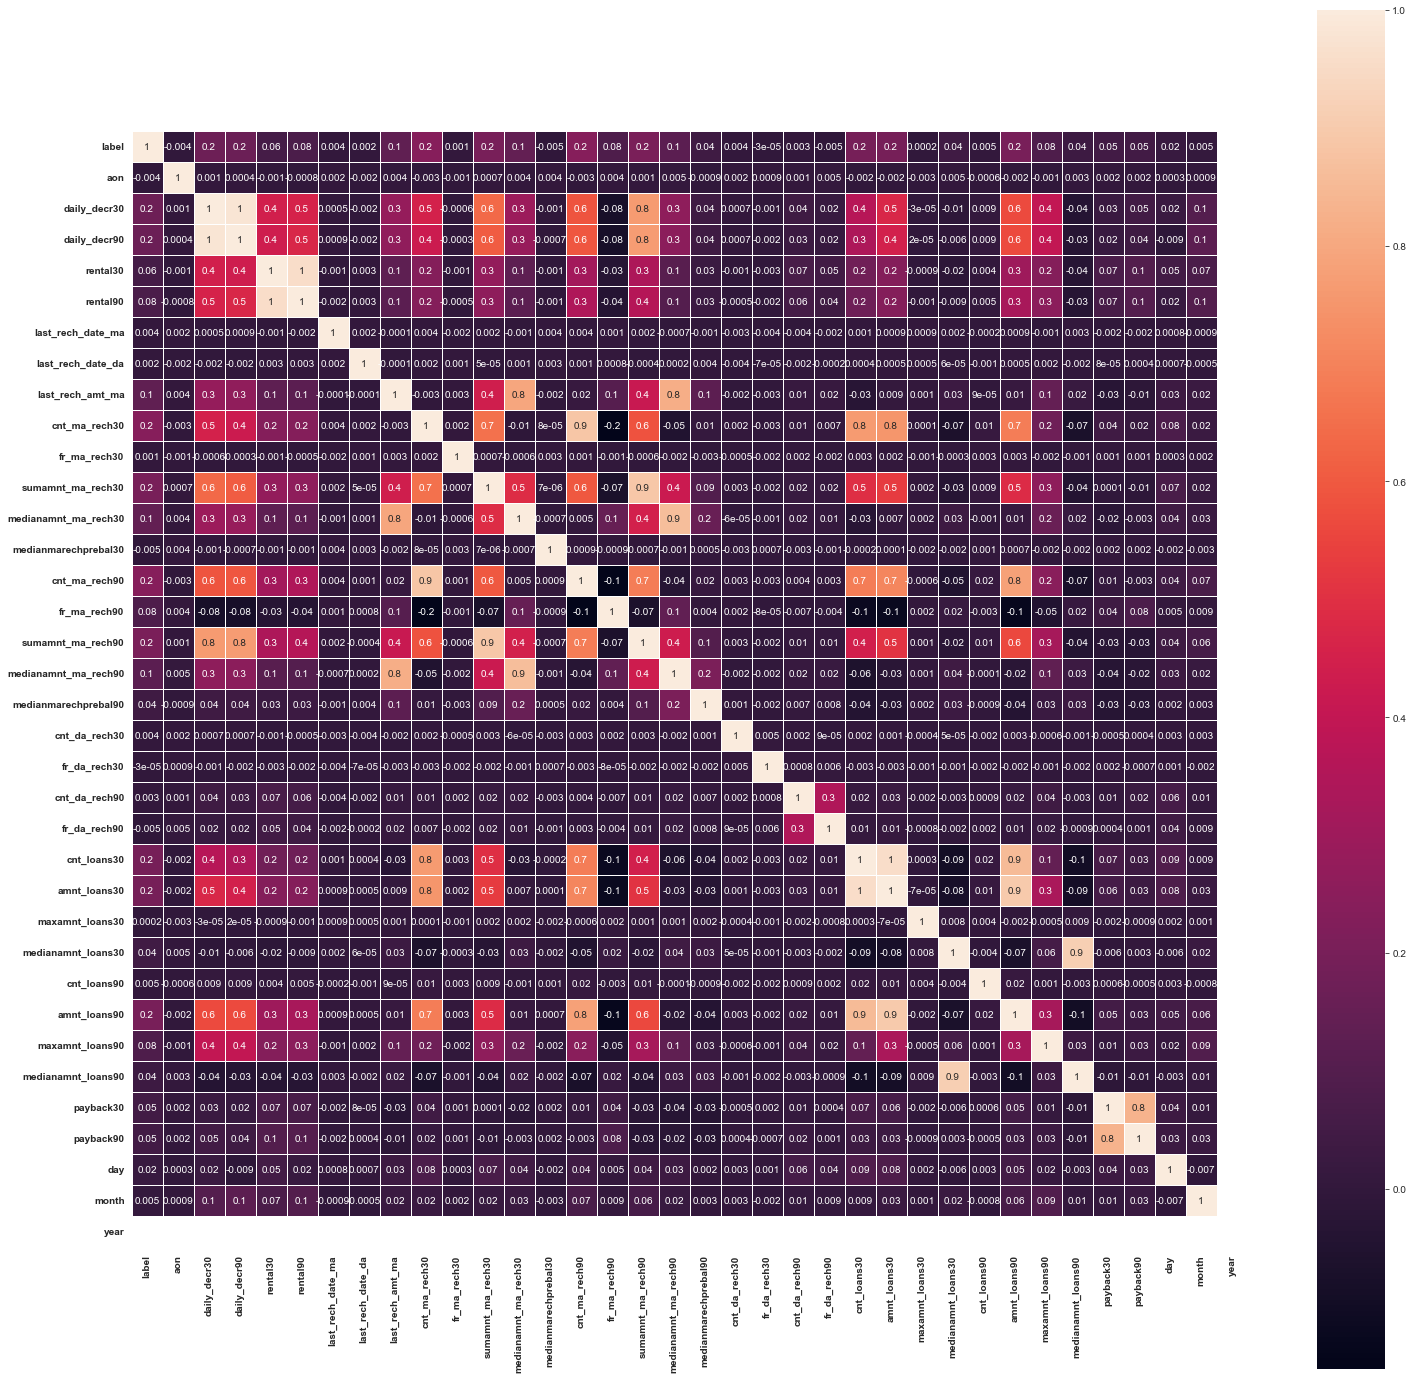

In [28]:
plt.figure(figsize = (25,25))
sns.heatmap(data.corr(), annot = True, fmt = '.1g', linewidth = 1, linecolor = 'white', square = True)
plt.xticks(fontweight = 'bold', fontsize = 10)
plt.yticks(fontweight = 'bold', fontsize = 10)
plt.show()

# Data Preprocessing

Removing Skewness

In [29]:
# checking skewness
cont_features.skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

In [30]:
# removing skewness with power_transform. Using yeo-johnson method because 0 is is in many columns.
new_df = power_transform(cont_features, method = 'yeo-johnson')

# making data frame of transformed data having column name same as it was before.
new_df = pd.DataFrame(new_df, columns = cont_features.columns)
cont_features = new_df
cont_features

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,1.603299,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964
1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,-1.128949,...,-0.913019,-0.097563,1.182431,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917
2,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,-1.128949,...,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917
3,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,-1.128949,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917
4,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,0.188872,...,1.570451,1.454951,-0.101998,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.679097,-0.313194,-0.366369,-0.058426,-0.074007,1.051183,0.096120,0.188872,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305
209589,0.152333,-0.950215,-0.942830,-0.140654,-0.229845,0.021231,-0.074007,-0.429509,0.384542,-0.239912,...,0.556347,0.393236,-0.101998,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305
209590,0.134577,1.100455,1.033424,0.825400,1.022476,0.000044,-0.074007,0.083417,0.620252,1.087596,...,0.924658,1.454951,1.182431,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939
209591,0.309101,1.136057,1.068381,-0.515607,-0.389820,-0.025513,1.677239,-0.429509,0.620252,0.649604,...,0.011773,0.393236,1.182431,-0.269051,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831


In [31]:
cont_features.skew()

aon                       1.654517
daily_decr30             -6.582718
daily_decr90             -7.080191
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362530
last_rech_date_da      -106.606657
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90               0.105580
amnt_loans90             -0.008988
maxamnt_loans90     

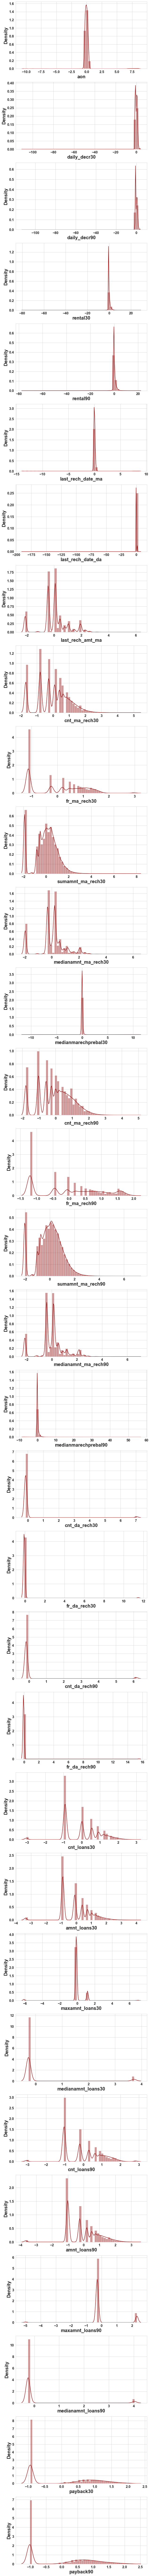

In [32]:
# for loop for plotting distribution plot of all continuous columns.
plt.figure(figsize = (10,200))
plotnumber = 1

for columns in cont_features:
    if plotnumber <= 32:
        ax = plt.subplot(32,1, plotnumber)
        sns.distplot(cont_features[columns], color = 'darkred')
        plt.xlabel(columns,fontweight = 'bold', fontsize = 20)
        plt.ylabel('Density', fontweight = 'bold', fontsize = 20)
        plt.xticks(fontweight = 'bold', fontsize = 15)
        plt.yticks(fontweight = 'bold', fontsize = 15)
    plotnumber+=1
plt.show()

We have successfully applied the power_transform to remove the skewness & in many of columns it worked significantly & reduced the skewness but not all column has got sorted because of nature of those column's data distribution

In [33]:
# adding four columns into data set back, those were removed from data set for visualization
cont_features['day'] = data['day']
cont_features['month'] = data['month']
cont_features['year'] = data['year']
cont_features['label'] = data['label']
Data = cont_features
Data

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month,year,label
0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,1.603299,...,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964,20,7,2016,0
1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,-1.128949,...,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917,8,10,2016,1
2,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,-1.128949,...,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,19,8,2016,1
3,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,-1.128949,...,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917,6,6,2016,1
4,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,0.188872,...,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438,22,6,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.679097,-0.313194,-0.366369,-0.058426,-0.074007,1.051183,0.096120,0.188872,...,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305,17,6,2016,1
209589,0.152333,-0.950215,-0.942830,-0.140654,-0.229845,0.021231,-0.074007,-0.429509,0.384542,-0.239912,...,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305,6,12,2016,1
209590,0.134577,1.100455,1.033424,0.825400,1.022476,0.000044,-0.074007,0.083417,0.620252,1.087596,...,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939,29,7,2016,1
209591,0.309101,1.136057,1.068381,-0.515607,-0.389820,-0.025513,1.677239,-0.429509,0.620252,0.649604,...,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831,25,7,2016,1


# Data Scaling

In [34]:
# splitting the data into features and label
x = Data.drop(columns = ['label'])
y = Data['label']

# scaling the data witn MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Finding Best Random State

In [ ]:
# intruppted

'''max_accu = 0
best_rs = 0

for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    y_pred_log = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_log)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Maximum Accuracy is :', max_accu, 'at random state ', best_rs)'''

# Creating Train Test Split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 77)

# Machine Learning Model Building

### Model 1. Logistic Regression

In [36]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)

print('Confusion Matrix for Logistic Regression Model is :\n\n', confusion_matrix(y_test, y_pred_log),'\n')

print('Accuracy Score for Logistic Regression Model is :\n\n', accuracy_score(y_test, y_pred_log),'\n')

print('Classification Report for the Logistic Regression :\n\n', classification_report(y_test, y_pred_log))

Confusion Matrix for Logistic Regression Model is :

 [[  642  5783]
 [  331 45643]] 

Accuracy Score for Logistic Regression Model is :

 0.8833183839386248 

Classification Report for the Logistic Regression :

               precision    recall  f1-score   support

           0       0.66      0.10      0.17      6425
           1       0.89      0.99      0.94     45974

    accuracy                           0.88     52399
   macro avg       0.77      0.55      0.56     52399
weighted avg       0.86      0.88      0.84     52399



### Model 2. K-Nearest Neighbors Classifier

In [37]:
# intruppted

'''knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print('Confusion Matrix for Knn Model is :\n', confusion_matrix(y_test, y_pred_knn),'\n')
print('Accuracy Score for Knn Model is :\n', accuracy_score(y_test, y_pred_knn),'\n')
print('Classification Report for the Knn Model is :\n', classification_report(y_test, y_pred_knn),'\n')'''

"knn = KNeighborsClassifier()\nknn.fit(x_train, y_train)\ny_pred_knn = knn.predict(x_test)\n\nprint('Confusion Matrix for Knn Model is :\n', confusion_matrix(y_test, y_pred_knn),'\n')\nprint('Accuracy Score for Knn Model is :\n', accuracy_score(y_test, y_pred_knn),'\n')\nprint('Classification Report for the Knn Model is :\n', classification_report(y_test, y_pred_knn),'\n')"

### Model 3. Decision Tree Classifier

In [38]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)

print('Confusion Matrix for Decision Tree Model is :\n', confusion_matrix(y_test, y_pred_dt),'\n')
print('Accuracy Score for Decision Tree Model is :\n', accuracy_score(y_test, y_pred_dt),'\n')
print('Classification Report for Decision Tree Model is :\n', classification_report(y_test, y_pred_dt), '\n')

Confusion Matrix for Decision Tree Model is :
 [[ 3602  2823]
 [ 3276 42698]] 

Accuracy Score for Decision Tree Model is :
 0.8836046489436822 

Classification Report for Decision Tree Model is :
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      6425
           1       0.94      0.93      0.93     45974

    accuracy                           0.88     52399
   macro avg       0.73      0.74      0.74     52399
weighted avg       0.89      0.88      0.89     52399
 



### Model 4. Random Forest Classifier

In [39]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)

print('Confusion Matrix for Random Forest Model is :\n', confusion_matrix(y_test, y_pred_rf),'\n')
print('Accuracy Score for Random Forest Model is :\n', accuracy_score(y_test, y_pred_rf),'\n')
print('Classification Report for the Random Forest Model is :\n', classification_report(y_test, y_pred_rf))

Confusion Matrix for Random Forest Model is :
 [[ 3278  3147]
 [  891 45083]] 

Accuracy Score for Random Forest Model is :
 0.9229374606385619 

Classification Report for the Random Forest Model is :
               precision    recall  f1-score   support

           0       0.79      0.51      0.62      6425
           1       0.93      0.98      0.96     45974

    accuracy                           0.92     52399
   macro avg       0.86      0.75      0.79     52399
weighted avg       0.92      0.92      0.92     52399



### Model 5. Support Vector Machine Classification

In [ ]:
# intruppted
'''
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

print('Confusion Matrix for the Support Vector Model is :\n', confusion_matrix(y_test, y_pred_svc),'\n')
print('Accuracy Score for the Support Vector Model is :\n', accuracy_score(y_test, y_pred_svc),'\n')
print('Classification Report for the Support Vector Model is :\n', classification_report(y_test, y_pred_svc))'''

We have created 3 machine learning classification models for Micro Credit Defaulter prediction & the result from both models are quite good. 2 Models exept Random Forest has given the accuracy quite closer to each other between 88% to 90%. But Random Forest Model has done acceptionally good. it has given the accuracy of 92.25% which greater than all the other models.

## AUC-ROC Curve

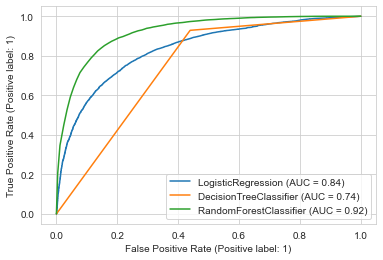

In [40]:
# Plotting roc_auc_curve

disp = plot_roc_curve(log_reg, x_test, y_test)
# plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(DT, x_test, y_test, ax = disp.ax_)
plot_roc_curve(RF, x_test, y_test, ax = disp.ax_)
# plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.show()

From above ROC plot we can see that Random Forest Model has the highest area under the curve hence we are going to finalize Random Forest as our Micro Cedit Defaulter Prediction Model. 

# Model Saving

In [42]:
# saving the model with pickle
file_name = 'Micro Credit Defaulter Project'
pickle.dump(RF, open(file_name, 'wb'))

# Loading & Predicting with Loaded Model. And Conclusion

In [43]:
loaded_model = pickle.load(open(filename, 'rb'))
Prediction = loaded_model.predict(x_test)

In [44]:
Actual = y_test

## Conclusion

In [45]:
# making data frame of predicted values and actual values
DF = pd.DataFrame([Prediction, Actual], index = ['Prediction', 'Actual'])
DF

,0,1,2,3,4,5,6,7,8,9,...,52389,52390,52391,52392,52393,52394,52395,52396,52397,52398
Prediction,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
Actual,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
